 <h1> Prelim Project </h1>  

Members:
Paz, John Glen & Ferrer, Joseph Bryan <br>
Course and Section: CPE 019 - CPE32S5 <br>
Date Performed: 03/7/2024 <br>
Date Submitted: 03/10/2024 <br>
Instructor: Engr. Roman Richard


# Loan Eligibility Dataset

### Import the Libraries and Data


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [871]:
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [801]:
train_data = pd.read_csv('loan_train.csv')

### Load and Show the Data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Plot the Data


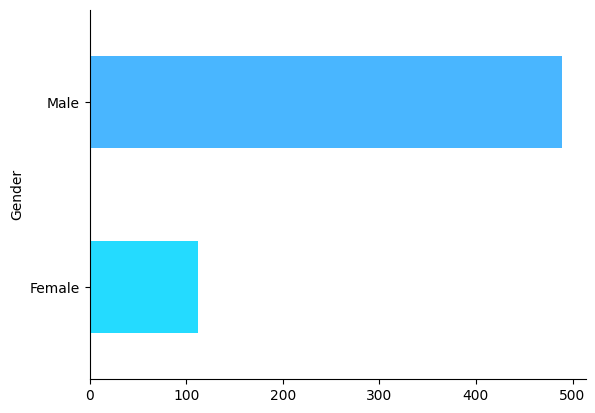

In [ ]:
train_data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

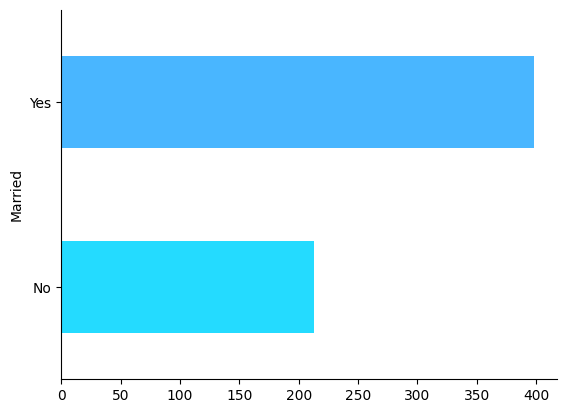

In [ ]:
train_data.groupby('Married').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

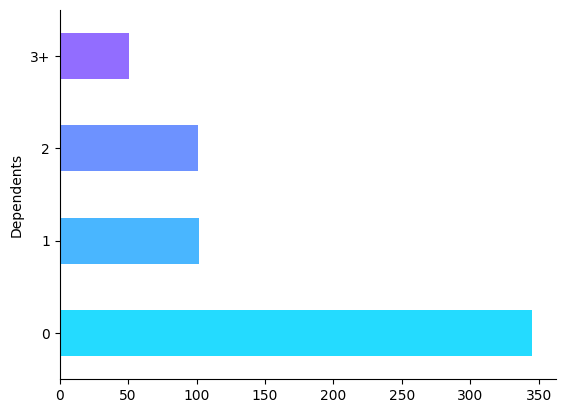

In [ ]:
train_data.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

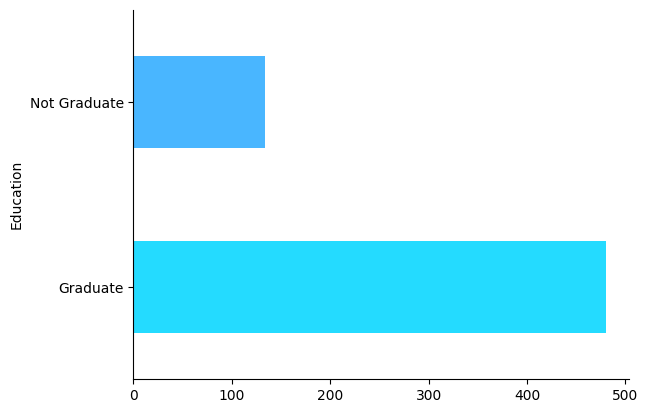

In [ ]:
train_data.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

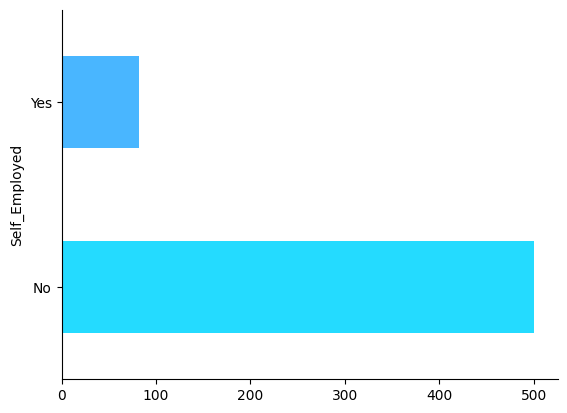

In [ ]:
train_data.groupby('Self_Employed').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

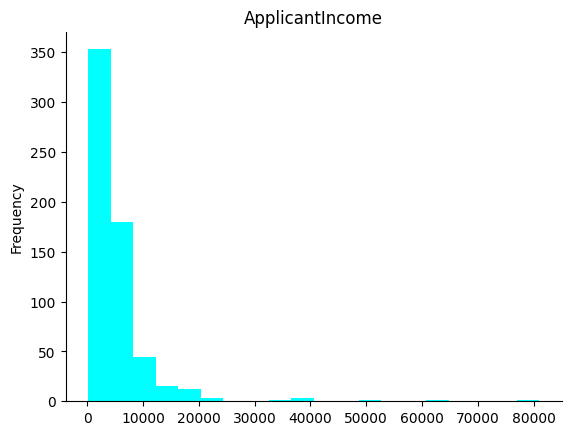

In [ ]:
train_data['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome', cmap='cool')
plt.gca().spines[['top', 'right']].set_visible(False)

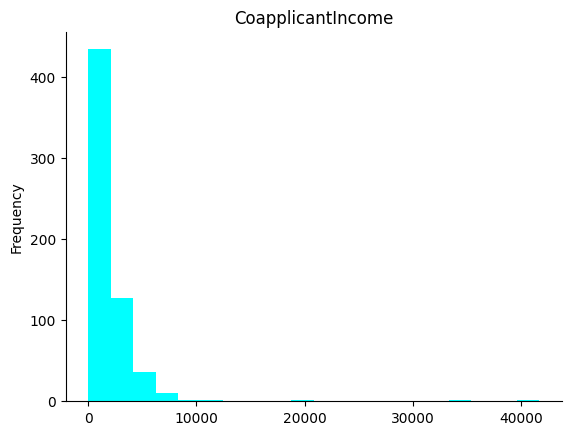

In [ ]:
train_data['CoapplicantIncome'].plot(kind='hist', bins=20, title='CoapplicantIncome', cmap='cool')
plt.gca().spines[['top', 'right']].set_visible(False)

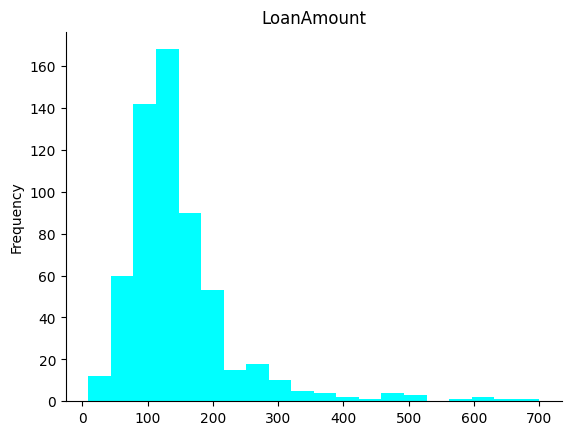

In [ ]:
train_data['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount', cmap='cool')
plt.gca().spines[['top', 'right']].set_visible(False)

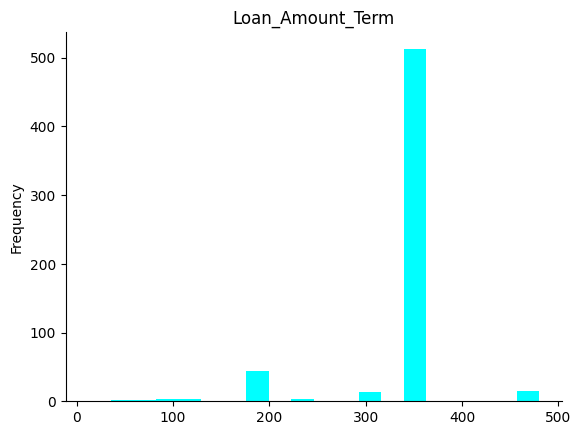

In [ ]:
train_data['Loan_Amount_Term'].plot(kind='hist', bins=20, title='Loan_Amount_Term', cmap='cool')
plt.gca().spines[['top', 'right']].set_visible(False)

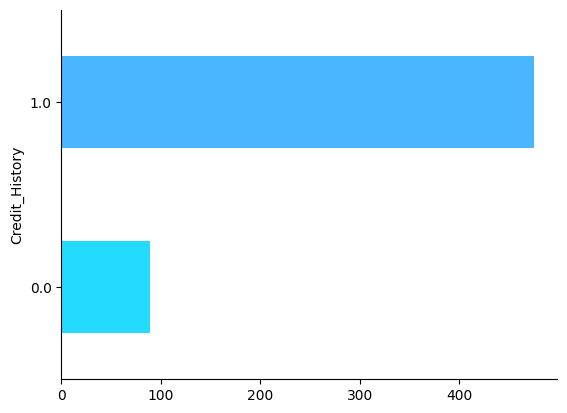

In [ ]:
train_data.groupby('Credit_History').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

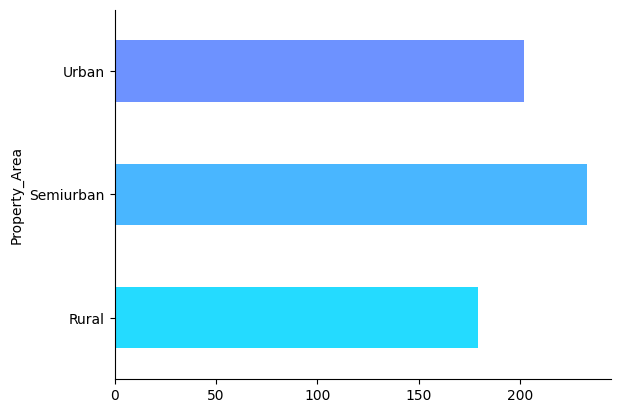

In [ ]:
train_data.groupby('Property_Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [763]:
train_data['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

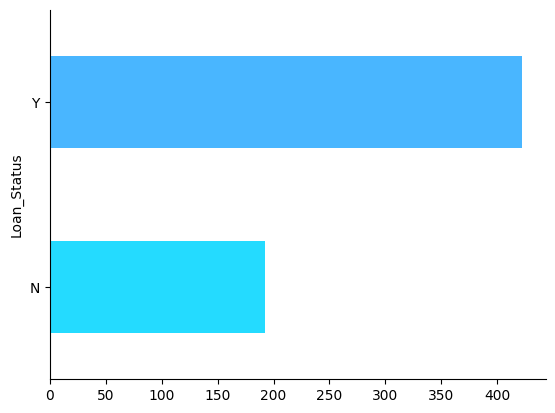

In [764]:
train_data.groupby('Loan_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('cool'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Removing Null Values

In [803]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [804]:
train_data['Gender'].fillna('Male', inplace = True)
train_data['Married'].fillna('Yes', inplace = True)
train_data['Self_Employed'].fillna('No', inplace = True)
train_data['Credit_History'].fillna('1.0', inplace = True)
train_data['LoanAmount'].fillna((train_data['LoanAmount'].mean()), inplace = True)
train_data['Loan_Amount_Term'].fillna('84', inplace = True)
train_data['Dependents'].fillna(0, inplace = True)

In [805]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [806]:
train_data.drop('Loan_ID', axis = 1, inplace = True)

In [769]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [807]:
loan_var = train_data.select_dtypes('object').columns
loan_var

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [808]:
oe = OrdinalEncoder()
train_data[loan_var] = train_data[loan_var].astype(str)
train_data[loan_var] = oe.fit_transform(train_data[loan_var])
train_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,6.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,6.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.000000,6.0,1.0,2.0,1.0
6,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.000000,6.0,1.0,2.0,1.0
7,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.000000,6.0,0.0,1.0,0.0
8,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.000000,6.0,1.0,2.0,1.0
9,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.000000,6.0,1.0,1.0,0.0


In [772]:
train_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,5.739414,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.325067,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,6.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,6.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,6.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,10.000000,1.000000,2.000000,1.000000


In [773]:
ss = StandardScaler()
train_data.iloc[:,:-1] = ss.fit_transform(train_data.iloc[:,:-1])
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


In [774]:
print(train_data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [775]:
x = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [776]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 4, test_size = 0.2, stratify = y)

In [777]:
train_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0
5,0.472343,0.728816,1.244745,-0.528362,2.547117,0.002218,0.880600,1.436099,0.196819,0.411733,1.223298,1.0
6,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.503019,-0.035995,-0.612275,0.196819,0.411733,1.223298,1.0
7,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.387850,0.301914,0.138001,0.196819,-2.428760,-0.047607,0.0
8,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.228939,-0.032575,0.257093,0.196819,0.411733,1.223298,1.0
9,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.218457,3.196713,2.412650,0.196819,0.411733,-0.047607,0.0


# Linear Regression

## Single Linear Regression


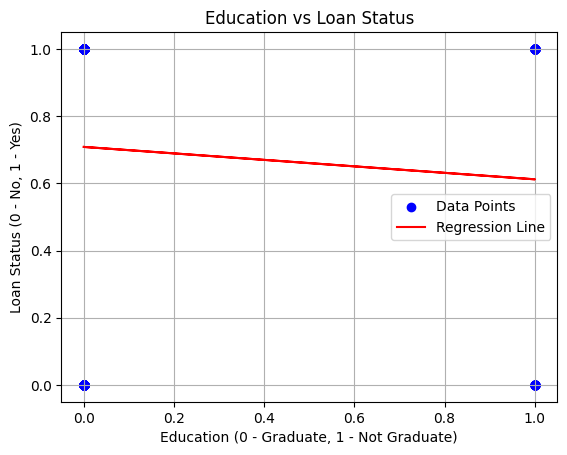

In [809]:
x, y = train_data.replace({'Education', 'Loan_Status'})[['Education', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Education (0 - Graduate, 1 - Not Graduate)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Education vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### Based on the plot, most of the individuals who have not graduated are more likely to apply for a loan and be accepted for it.

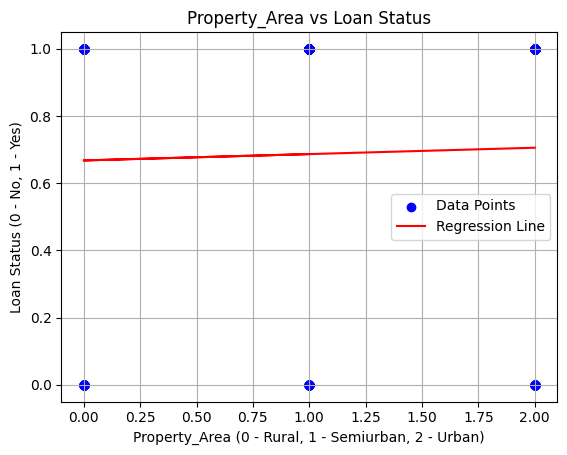

In [810]:
x, y = train_data.replace({'Property_Area', 'Loan_Status'})[['Property_Area', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Property_Area (0 - Rural, 1 - Semiurban, 2 - Urban)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Property_Area vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### Based on the plot, there is a slight diagonal line in the plot indicating that most individuals who live in urban areas are more likely to apply for a loan and be accepted for it

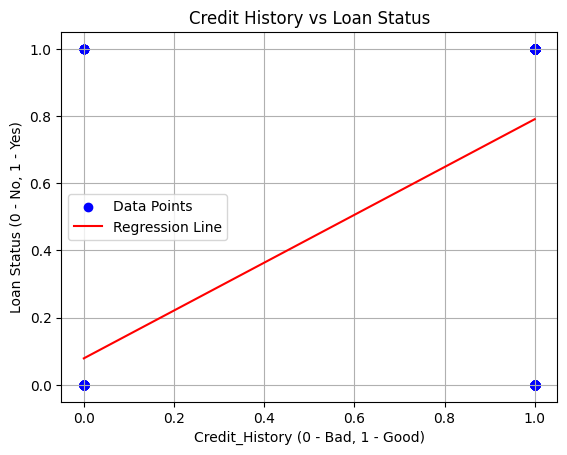

In [823]:
x, y = train_data.replace({'Credit_History', 'Loan_Status'})[['Credit_History', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Credit_History (0 - Bad, 1 - Good)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Credit History vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### The credit history is how a person has his/her loans. 0 means bad history and 1 means good history. Therefore, it shows that most of the people who have a good credit history are the ones who are accepted.

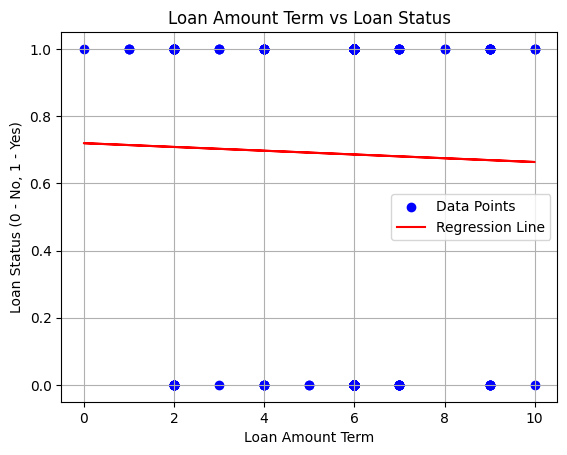

In [816]:
x, y = train_data.replace({'Loan_Amount_Term', 'Loan_Status'})[['Loan_Amount_Term', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Loan Amount Term")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Loan Amount Term vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### The credit history is how a person has his/her loans. 0 means bad history and 1 means good history. Therefore, it shows that most of the people who have a good credit history are the ones who are accepted.

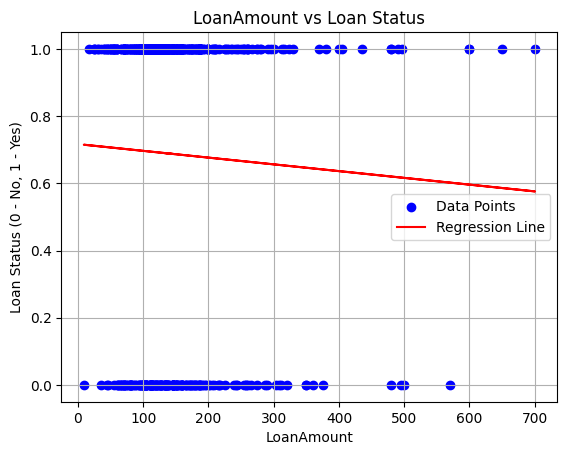

In [815]:
x, y = train_data.replace({'LoanAmount', 'Loan_Status'})[['LoanAmount', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("LoanAmount")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('LoanAmount vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### Based on the plot, it could mean that as the loan amount increases, there is a slight tendency for the loan to be not approved

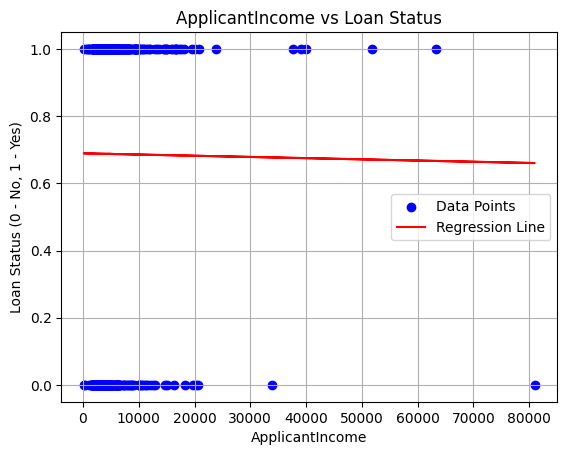

In [818]:
x, y = train_data.replace({'ApplicantIncome', 'Loan_Status'})[['ApplicantIncome', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("ApplicantIncome")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('ApplicantIncome vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### There is a small amount of applicant income who range from 40,000 to 80,000 so there is a slight difference in their loan status. Most of the accepted are those who range from 0-20,000.

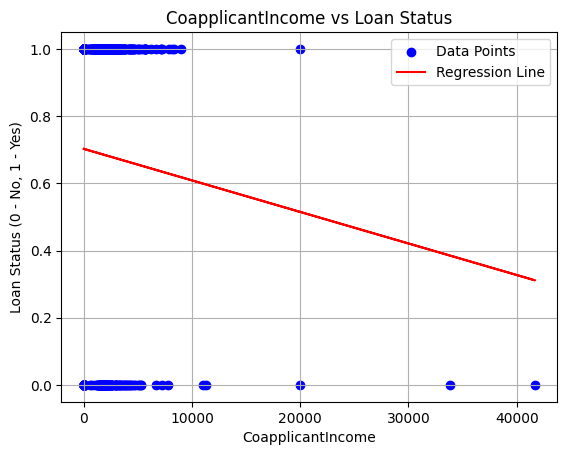

In [817]:
x, y = train_data.replace({'CoapplicantIncome', 'Loan_Status'})[['CoapplicantIncome', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("CoapplicantIncome")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('CoapplicantIncome vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### There is a small amount of co-applicant income who range from 20,000 to 40,000 so most of the accepted are those who range from 0-10,000.

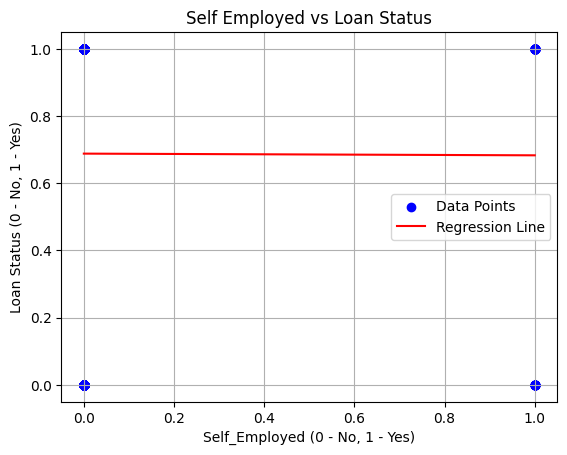

In [819]:
x, y = train_data.replace({'Self_Employed', 'Loan_Status'})[['Self_Employed', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Self_Employed (0 - No, 1 - Yes)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Self Employed vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### The plot shows a straight horizontal line and the data from self-employed individuals are mostly not employed, with only a small fraction being employed, leads to a situation where the linear regression model fits a horizontal line with a constant predicted value.

Mean Squared Error: 0.18699186991869918


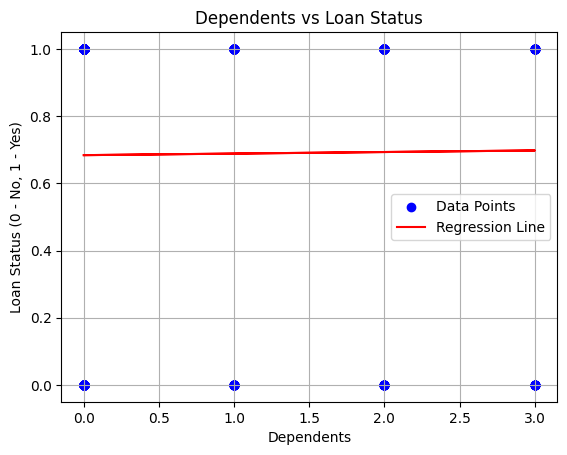

In [820]:
x, y = train_data.replace({'Dependents', 'Loan_Status'})[['Dependents', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)
print("Mean Squared Error:", mse)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Dependents")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Dependents vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### There is a slight difference in the number of dependents, but the trend indicates that individuals with more dependents are more likely to be accepted for a loan,

Mean Squared Error: 0.18699186991869918


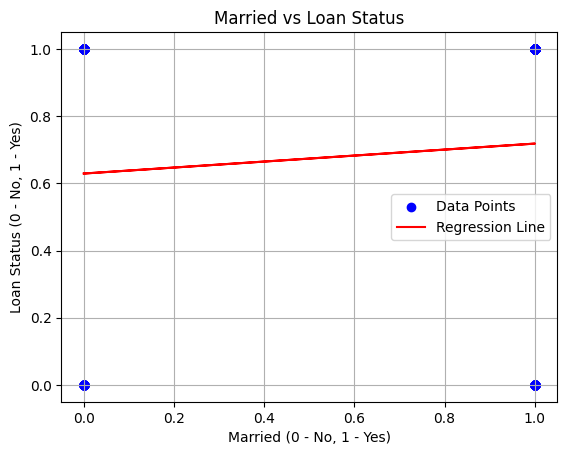

In [821]:
x, y = train_data.replace({'Married', 'Loan_Status'})[['Married', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)
print("Mean Squared Error:", mse)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Married (0 - No, 1 - Yes)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Married vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### The plot indicates that most individuals who apply for a loan and are accepted are those who are married,

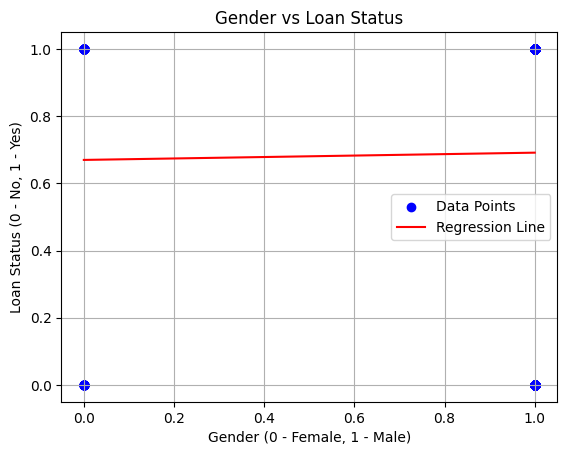

In [822]:
x, y = train_data.replace({'Gender', 'Loan_Status'})[['Gender', 'Loan_Status']].T.values

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel("Gender (0 - Female, 1 - Male)")
plt.ylabel("Loan Status (0 - No, 1 - Yes)")
plt.title('Gender vs Loan Status')
plt.legend()
plt.grid(True)
plt.show()

### There is a slight difference in gender but there are more accepted male than female.

## Multiple Linear Regression


Train RMSE: 0.45409188737383294
Test RMSE: 0.4775123657768577


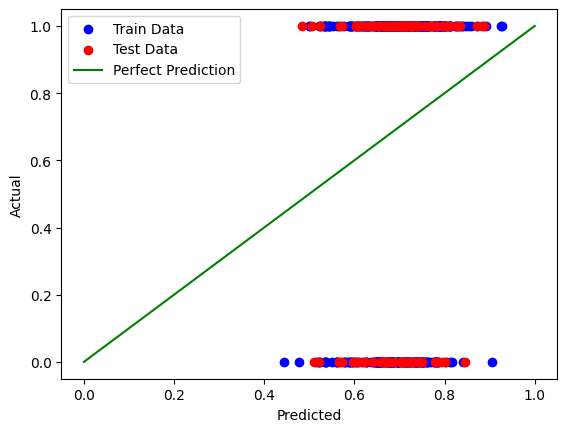

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

multi_model = LinearRegression()
multi_model.fit(x_train, y_train)

y_train_predicted = multi_model.predict(x_train)
y_test_predicted = multi_model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

plt.scatter(y_train_predicted, y_train, color='blue', label='Train Data')
plt.scatter(y_test_predicted, y_test, color='red', label='Test Data')

min_val = min(np.min(y_train), np.min(y_test))
max_val = max(np.max(y_train), np.max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='green', label='Perfect Prediction')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

The data points are scattered around the diagonal line, which means that the model's predictions are not always perfect. There are some data points above the diagonal line, which means that the model overpredicted the loan amount for some applications. There are also data points below the line, which means that the model underpredicted the loan amount for other applications.

Train RMSE is the root mean squared error between the predicted loan amounts for the training data and the actual loan amounts for the training data.

Test RMSE is the root mean squared error between the predicted loan amounts for the testing data and the actual loan amounts for the testing data.

## Polynomial Linear Regression


In [ ]:
X = train_data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

Mean Squared Error (Polynomial Regression): 0.17165118103065763


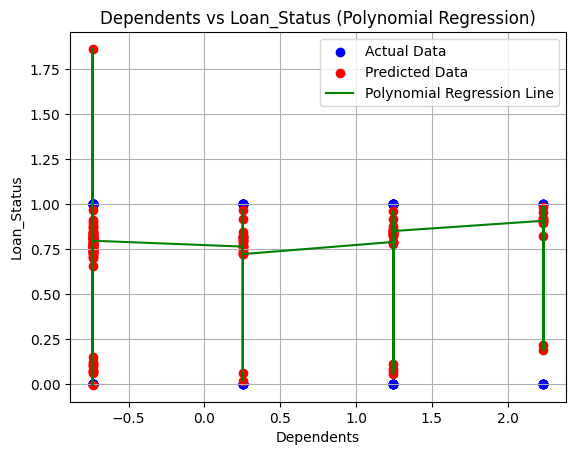

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

plt.scatter(X_test['Dependents'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Dependents'], y_pred_poly, color='red', label='Predicted Data')

sort_indices = np.argsort(X_test['Dependents'])
X_test_sorted = X_test['Dependents'].values[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression Line')

plt.xlabel("Dependents")
plt.ylabel("Loan_Status")
plt.title('Dependents vs Loan_Status (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 0.17165118103065763


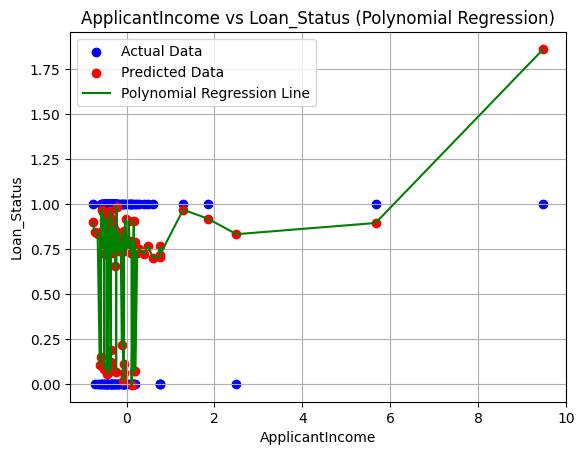

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

plt.scatter(X_test['ApplicantIncome'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['ApplicantIncome'], y_pred_poly, color='red', label='Predicted Data')

sort_indices = np.argsort(X_test['ApplicantIncome'])
X_test_sorted = X_test['ApplicantIncome'].values[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression Line')

plt.xlabel("ApplicantIncome")
plt.ylabel("Loan_Status")
plt.title('ApplicantIncome vs Loan_Status (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 0.17165118103065763


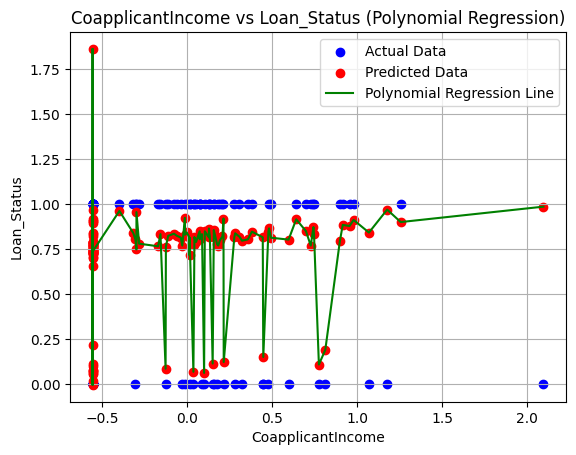

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

plt.scatter(X_test['CoapplicantIncome'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['CoapplicantIncome'], y_pred_poly, color='red', label='Predicted Data')

sort_indices = np.argsort(X_test['CoapplicantIncome'])
X_test_sorted = X_test['CoapplicantIncome'].values[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression Line')

plt.xlabel("CoapplicantIncome")
plt.ylabel("Loan_Status")
plt.title('CoapplicantIncome vs Loan_Status (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 0.17165118103065763


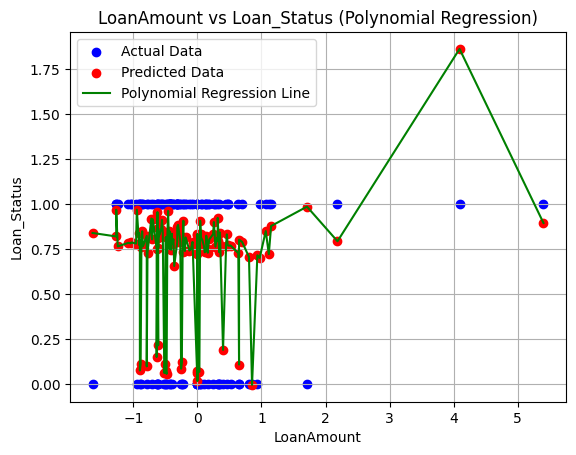

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

plt.scatter(X_test['LoanAmount'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['LoanAmount'], y_pred_poly, color='red', label='Predicted Data')

sort_indices = np.argsort(X_test['LoanAmount'])
X_test_sorted = X_test['LoanAmount'].values[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression Line')

plt.xlabel("LoanAmount")
plt.ylabel("Loan_Status")
plt.title('LoanAmount vs Loan_Status (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 0.17165118103065763


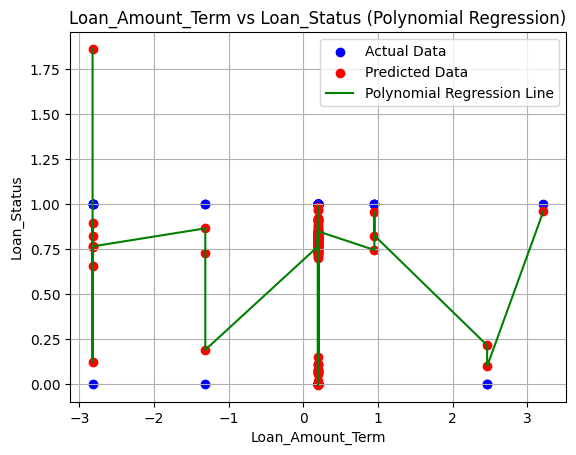

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

plt.scatter(X_test['Loan_Amount_Term'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Loan_Amount_Term'], y_pred_poly, color='red', label='Predicted Data')

sort_indices = np.argsort(X_test['Loan_Amount_Term'])
X_test_sorted = X_test['Loan_Amount_Term'].values[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression Line')

plt.xlabel("Loan_Amount_Term")
plt.ylabel("Loan_Status")
plt.title('Loan_Amount_Term vs Loan_Status (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

In [824]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)
print(str(lr)[:-14], 'Accuracy')
print('Accuracy: ', accuracy_score(y_test, y_pred), "\nClassification Report: \n", classification_report(y_test, y_pred), '\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print(f'\nTraining Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')

LogisticRegression Accuracy
Accuracy:  0.8211382113821138 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.42      0.59        38
         1.0       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg       0.86      0.82      0.79       123
 
Confusion Matrix: 
 [[16 22]
 [ 0 85]]

Training Accuracy: 0.8085539714867617
Testing Accuracy: 0.8211382113821138


In [870]:
probs = lr.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

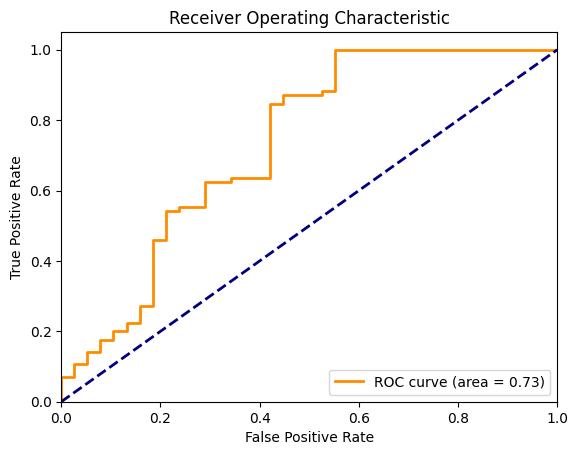

In [826]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

True Positive Rate (TPR): This is the proportion of actual positive cases (approved loans) that were correctly identified by the model. It is also known as recall.

False Positive Rate (FPR): This is the proportion of negative cases (not approved loans) that were incorrectly classified as positive (approved loans) by the model.

### In the specific ROC curve above, the AUC-ROC value is 0.73. This suggests that the model has an acceptable ability to distinguish between loan applications that will be approved and those that will not be approved. However, it is not a perfect classifier.

In [827]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)

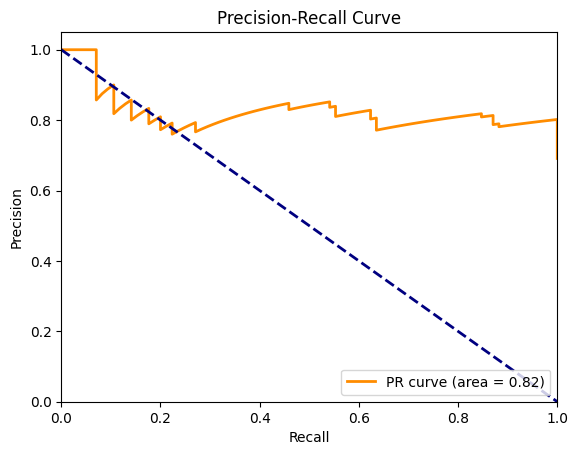

In [828]:
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange', lw=lw, label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [1, 0], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

Precision:  It represents the accuracy of your model's positive predictions. A high precision means that a large percentage of the applications the model predicted as approved were actually approved.

Recall: It represents how good the model is at identifying all the positive cases.  A high recall would mean that the model identified a large percentage of the applications that were actually approved.

### The curve leans more towards the top-left corner of the graph, which suggests a good balance between precision and recall. The model can achieve a decent proportion of correct positive predictions (precision) while also identifying a reasonable number of actual positive cases (recall).

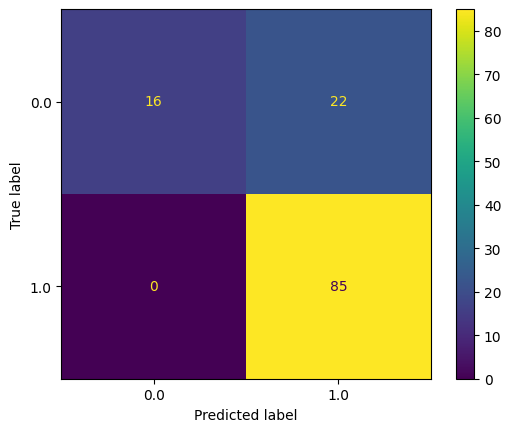

In [829]:
ConfusionMatrixDisplay.from_estimator(lr,x_test,y_test);

The Confusion Matrix above shows have 4 values:

There are 16 True Positives (TP) which are the number of loan applications that were actually approved (positive class) and also predicted as approved by the model. (correctly classified)

There are 22 False Positives (FP) which are the number of loan applications that were not approved (negative class) but were predicted as approved by the model (incorrectly classified).

There are 0 False Negatives (FN) which are the number of loan applications that were actually approved (positive class) but were predicted as not approved by the model (incorrectly classified).

There are 85 True Negatives (TN) which are the number of loan applications that were not approved (negative class) and also predicted as not approved by the model (correctly classified).

# Decision Tree


In [789]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
train_accuracy = dt.score(x_train, y_train)
test_accuracy = dt.score(x_test, y_test)
print(str(dt)[:-2], 'Accuracy')
print('Accuracy: ', accuracy_score(y_test, y_pred), "\nClassification Report: \n", classification_report(y_test, y_pred), '\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print(f'\nTraining Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')

DecisionTreeClassifier Accuracy
Accuracy:  0.7235772357723578 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.55      0.61      0.57        38
         1.0       0.81      0.78      0.80        85

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.73      0.72      0.73       123
 
Confusion Matrix: 
 [[23 15]
 [19 66]]

Training Accuracy: 1.0
Testing Accuracy: 0.7235772357723578


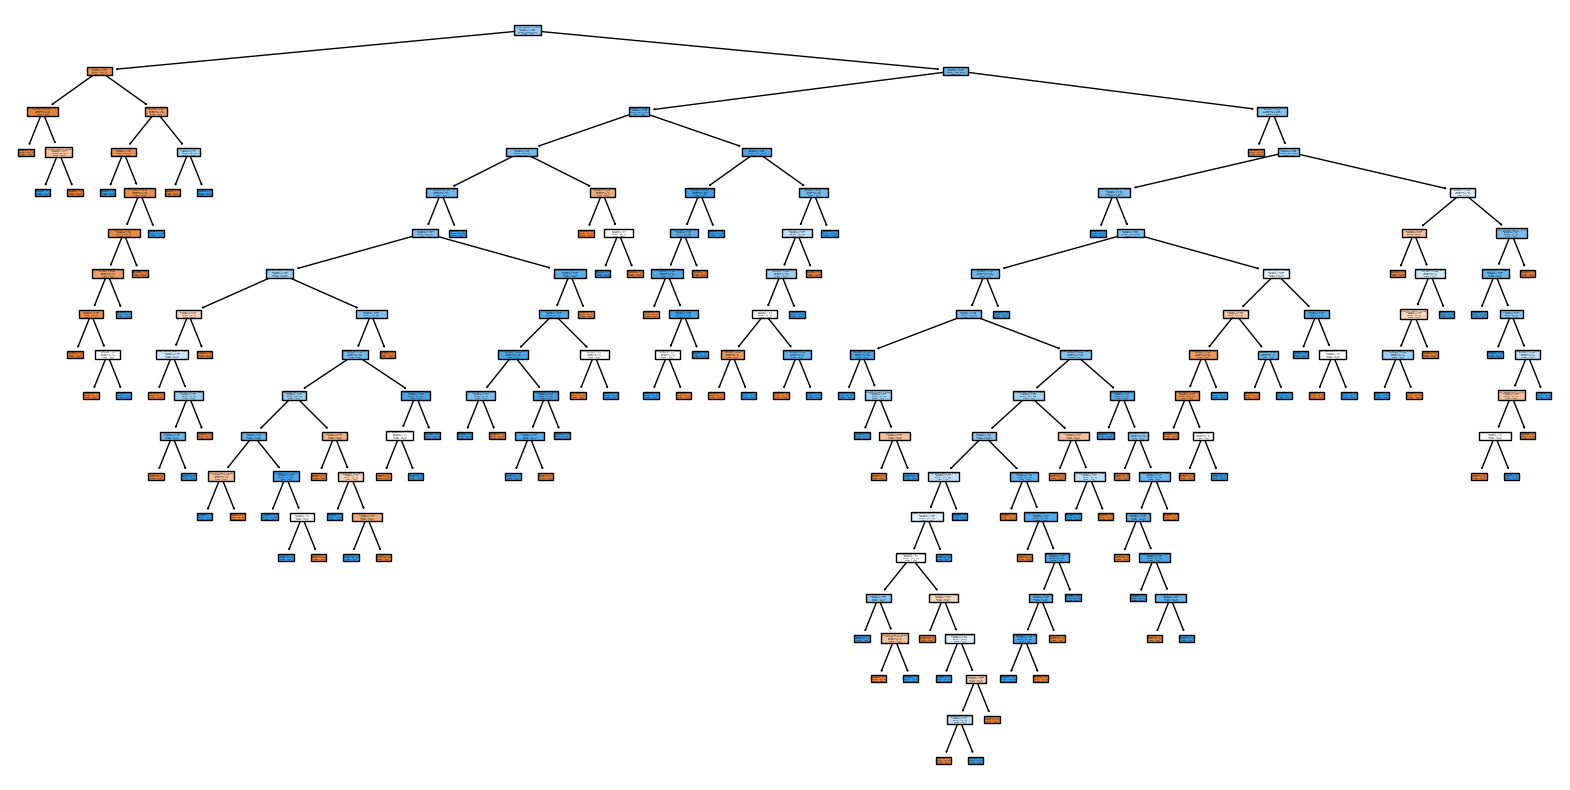

In [790]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')

dt_entropy.fit(x_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=x_train.columns, class_names=True)
plt.show()

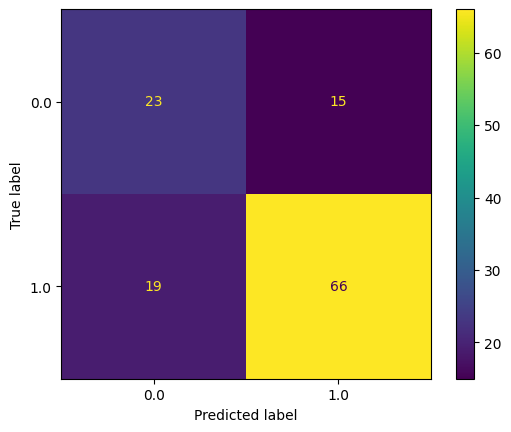

In [830]:
ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test);

There are 23 True Positives (TP) which are the number of loan applications that were actually approved (positive class) and also predicted as approved by the model. (correctly classified)

There are 15 False Positives (FP) which are the number of loan applications that were not approved (negative class) but were predicted as approved by the model (incorrectly classified).

There are 19 False Negatives (FN) which are the number of loan applications that were actually approved (positive class) but were predicted as not approved by the model (incorrectly classified).

There are 66 True Negatives (TN) which are the number of loan applications that were not approved (negative class) and also predicted as not approved by the model (correctly classified).

# Random Forest


In [862]:
rfc = (RandomForestClassifier(n_estimators = 8, max_depth = 10, min_samples_leaf = 12))
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
train_accuracy = rfc.score(x_train, y_train)
test_accuracy = rfc.score(x_test, y_test)
print(str(rfc)[:-51], 'Accuracy')
print('Accuracy: ', accuracy_score(y_test, y_pred), "\nClassification Report: \n", classification_report(y_test, y_pred), '\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print(f'\nTraining Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')

RandomForestClassifier Accuracy
Accuracy:  0.8130081300813008 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.39      0.57        38
         1.0       0.79      1.00      0.88        85

    accuracy                           0.81       123
   macro avg       0.89      0.70      0.72       123
weighted avg       0.85      0.81      0.78       123
 
Confusion Matrix: 
 [[15 23]
 [ 0 85]]

Training Accuracy: 0.8105906313645621
Testing Accuracy: 0.8130081300813008


In [863]:
probs = rfc.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

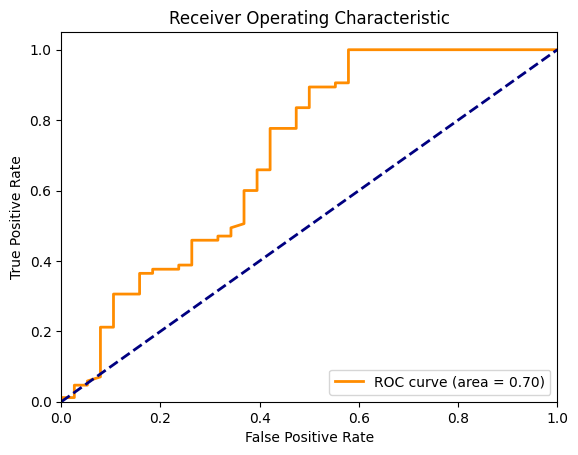

In [864]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### In the depicted ROC curve, the AUC-ROC value stands at 0.70. This indicates that the model possesses a reasonable capability to differentiate between approved and rejected loan applications. Nonetheless, it falls short of being a flawless classifier.






In [865]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)

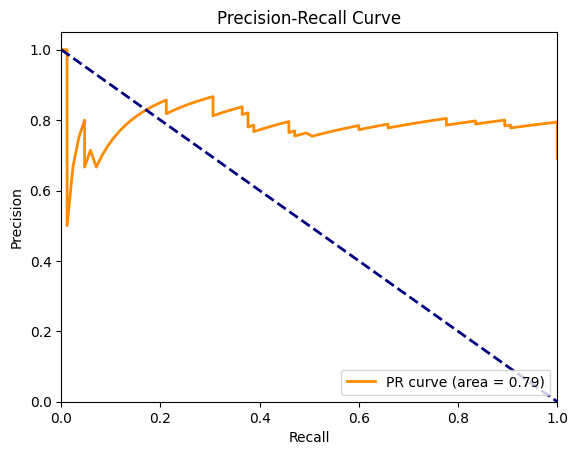

In [866]:
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange', lw=lw, label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [1, 0], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

### The PR curve value is 0.79 which demonstrates an ability to achieve a substantial proportion of accurate positive predictions (precision) while also capturing a noteworthy number of true positive cases (recall).

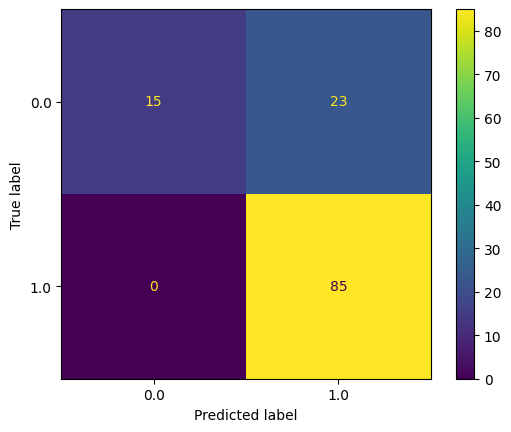

In [869]:
ConfusionMatrixDisplay.from_estimator(rfc,x_test,y_test);

There are 15 True Positives (TP) which are the number of loan applications that were actually approved (positive class) and also predicted as approved by the model. (correctly classified)

There are 23 False Positives (FP) which are the number of loan applications that were not approved (negative class) but were predicted as approved by the model (incorrectly classified).

There are 0 False Negatives (FN) which are the number of loan applications that were actually approved (positive class) but were predicted as not approved by the model (incorrectly classified).

There are 85 True Negatives (TN) which are the number of loan applications that were not approved (negative class) and also predicted as not approved by the model (correctly classified).

## Conclusion:
We produce sample data for income, credit score, loan amount, and the binary goal variable 'Loan_Eligibility'. We next apply each algorithm to the training data and make predictions about the testing data. In the end, we assess each model's performance using the accuracy score in the case of regression models and the accuracy score in conjunction with the classification report for classification models.

## Observation:
Given their capacity to handle binary classification problems efficiently, logistic regression and random forest are likely to be the most appropriate algorithms for the dataset that we select. However, the choice of algorithm should take into account issues like as interpretability, computing efficiency, and the necessity for model complexity.

##Lessons Learned:
We learned how important it is to select algorithms that are appropriate for the problem type, understand each algorithm's strengths and limits, and use appropriate strategies to overcome potential challenges such as overfitting. Furthermore, clarity and comprehension of less frequent algorithms are critical for making informed judgments in machine learning applications.